# Heatwave Analysis

Graphing:
* Change in number
* Change in magnitude

For tasmax and tasmin

4 graphs per cell. 

Graphing or raw data is going to be 300 pages long. 

For each cell, load up tasmax, tasmin and a graph of 4 subgrapsh (change in num and change in max for both of them)

1. NUmber of heatwave days per year - absolute number and percentage (on same graph as they are linked)
2. Highest value per year for each graph

1. Length
2. Percentage of days
3. Highest value 

In [1]:
tasmax = pd.read_csv("tasmax_heatwaves.csv")
tasmax = tasmax.set_index(["lon", "lat", "date"])

tasmin = pd.read_csv("tasmin_heatwaves.csv")
tasmin = tasmin.set_index(["lon", "lat", "date"])

# Need this to get all the cells
tasmax_other = pd.read_csv("tasmax_heatwaves.csv")
tasmax_other = tasmax_other.set_index(["lon", "lat"])

In [2]:
# Store cells in variable
cells = list(np.unique(tasmax_other.index))

Go through cell by year and count number per year. 

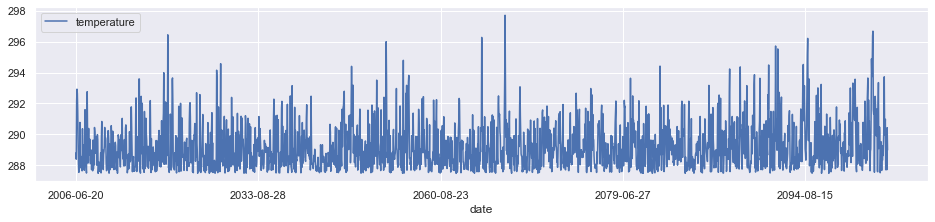

In [3]:
tasmin.loc[-122.75, 42.25].plot(figsize=plt.figaspect(1 / 5))

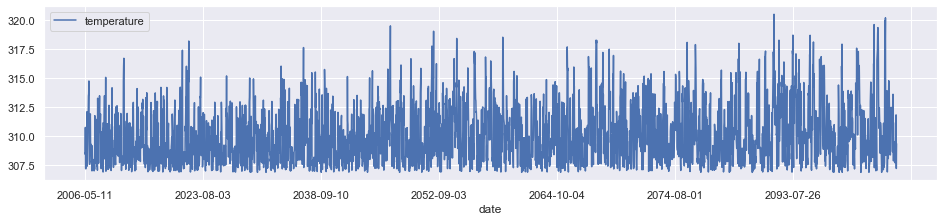

In [13]:
tasmax.loc[-122.75, 42.25].plot(figsize=plt.figaspect(1 / 5))

In [4]:
# Creates analysis.csv - is quite slow
def create_analysis_csv():
    for i, cell in enumerate(cells):
        df_cell = pd.DataFrame()
        for year in range(2006, 2100):
            data_tasmin = tasmin.loc[cell].loc[f"{year}":f"{year+1}"]
            data_tasmax = tasmax.loc[cell].loc[f"{year}":f"{year+1}"]

            lon, lat = cell[0], cell[1]

            tasmin_num_days, tasmax_num_days = len(data_tasmin), len(data_tasmax)
            tasmin_pct_days, tasmax_pct_days = (
                len(data_tasmin) / 365.25,
                len(data_tasmax) / 365.25,
            )
            tasmin_max_temp, tasmax_max_temp = float(data_tasmin.max()), float(
                data_tasmax.max()
            )

            data_dict = {
                "lon": lon,
                "lat": lat,
                "year": np.datetime64(str(year)),
                "tasmax_num_days": tasmax_num_days,
                "tasmax_pct_days": tasmax_pct_days,
                "tasmax_max_temp": tasmax_max_temp,
                "tasmin_num_days": tasmin_num_days,
                "tasmin_pct_days": tasmin_pct_days,
                "tasmin_max_temp": tasmin_max_temp,
            }

            df = pd.DataFrame(data_dict, index=[0])
            df = df.set_index(["lon", "lat"])

            if i == 0 and year == 2006:
                df.to_csv("analysis.csv")
            else:
                df.to_csv("analysis.csv", mode="a", header=False)
        print(f"it worked for {cell}")

In [5]:
analysis = pd.read_csv("analysis.csv")
analysis = analysis.set_index(["lon", "lat", "year"])
analysis

tasmax_num_days  tasmax_pct_days  tasmax_max_temp  \
lon     lat   year                                                            
-122.75 42.25 2006-01-01               34         0.093087       314.748779   
              2007-01-01               18         0.049281       311.763672   
              2008-01-01               43         0.117728       315.062805   
              2009-01-01                9         0.024641       312.657166   
              2010-01-01               19         0.052019       314.164001   
...                                   ...              ...              ...   
-11.75  7.75  2093-01-01               10         0.027379       317.064972   
              2094-01-01               28         0.076660       315.848969   
              2095-01-01               27         0.073922       316.823334   
              2096-01-01               28         0.076660       316.540833   
              2097-01-01               37         0.101300       316.394226   

                          tasmin_num_days  tasmin_pct_days  tasmin_max_temp  
lon     lat   year                                                           
-122.75 42.25 2006-01-01               12         0.032854       292.928497  
              2007-01-01               18         0.049281       291.598755  
              2008-01-01               13         0.035592       292.765961  
              2009-01-01                3         0.008214       288.956512  
              2010-01-01               24         0.065708       290.444702  
...                                   ...              ...              ...  
-11.75  7.75  2093-01-01              336         0.919918       303.544891  
              2094-01-01              272         0.744695       302.084656  
              2095-01-01              300         0.821355       302.689453  
              2096-01-01              320         0.876112       303.241150  
              2097-01-01              281         0.769336       303.145691  

[5732 rows x 6 columns]

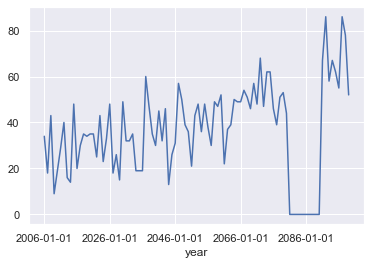

In [62]:
analysis.loc[-122.75, 42.25].tasmax_num_days.plot()

In [6]:
# Creates all the plots in your current working directory
def create_actual_data_plots():
    for i, cell in enumerate(cells):
        fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)

        data = analysis.loc[cell]
        rolling = data.rolling(window=5, win_type="exponential")
        rolling_mean = rolling.mean(tau=20)

        axes[0, 0].plot(data.tasmax_num_days, "r", label="Actual")
        axes[0, 0].plot(rolling_mean.tasmax_num_days, "k", label="Rolling mean")
        axes[0, 0].set(title="Tasmax Num Days")
        axes[0, 0].legend()

        axes[0, 1].plot(data.tasmin_num_days, "b", label="Actual")
        axes[0, 1].plot(rolling_mean.tasmin_num_days, "k", label="Rolling mean")
        axes[0, 1].set(title="Tasmin Num Days")
        axes[0, 1].legend()

        axes[1, 0].plot(data.tasmax_max_temp, "r")
        axes[1, 0].plot(rolling_mean.tasmax_max_temp, "k")
        axes[1, 0].set(title="Tasmax Max Temperature", xlabel="Date (2006-2099)")

        axes[1, 1].plot(data.tasmin_max_temp, "b")
        axes[1, 1].plot(rolling_mean.tasmin_max_temp, "k")
        axes[1, 1].set(title="Tasmin Max Temperature", xlabel="Date (2006-2099)")

        axes[1, 0].set_xticks([])
        axes[1, 1].set_xticks([])

        plt.tight_layout()

        fig.suptitle(f"{cell}")
        plt.savefig(f"{cell}.pdf")
        print(f"Index {i} worked for {cell}")

Index 0 worked for (-122.75, 42.25)
Index 1 worked for (-119.75, 34.25)
Index 2 worked for (-118.25, 34.75)
Index 3 worked for (-109.75, 31.25)
Index 4 worked for (-106.75, 32.25)
Index 5 worked for (-106.25, 28.75)
Index 6 worked for (-103.25, 25.75)
Index 7 worked for (-102.75, 20.75)
Index 8 worked for (-99.75, 16.75)
Index 9 worked for (-99.75, 17.75)
Index 10 worked for (-98.75, 20.25)
Index 11 worked for (-98.25, 34.75)
Index 12 worked for (-97.75, 25.75)
Index 13 worked for (-97.25, 19.75)
Index 14 worked for (-96.25, 42.25)
Index 15 worked for (-91.25, 14.25)
Index 16 worked for (-90.75, 42.75)
Index 17 worked for (-88.25, 15.25)
Index 18 worked for (-87.75, 42.25)
Index 19 worked for (-85.75, 42.75)


<ipython-input-6-e0b676336386>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)


Index 20 worked for (-84.75, 42.75)


<ipython-input-6-e0b676336386>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)


Index 21 worked for (-84.25, 33.75)


<ipython-input-6-e0b676336386>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)


Index 22 worked for (-79.75, -1.25)


<ipython-input-6-e0b676336386>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)


Index 23 worked for (-79.25, 44.25)


<ipython-input-6-e0b676336386>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)


Index 24 worked for (-77.75, 21.25)


<ipython-input-6-e0b676336386>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)


Index 25 worked for (-76.25, 4.25)


<ipython-input-6-e0b676336386>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)


Index 26 worked for (-75.25, 7.75)


<ipython-input-6-e0b676336386>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)


Index 27 worked for (-73.75, 18.25)


<ipython-input-6-e0b676336386>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)


Index 28 worked for (-73.25, -40.75)


<ipython-input-6-e0b676336386>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)


Index 29 worked for (-73.25, 41.25)


<ipython-input-6-e0b676336386>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)


Index 30 worked for (-72.75, 10.25)


<ipython-input-6-e0b676336386>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)


Index 31 worked for (-72.75, 46.25)


<ipython-input-6-e0b676336386>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)


Index 32 worked for (-71.75, -35.75)


<ipython-input-6-e0b676336386>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)


Index 33 worked for (-71.25, 10.25)


<ipython-input-6-e0b676336386>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)


KeyboardInterrupt: 

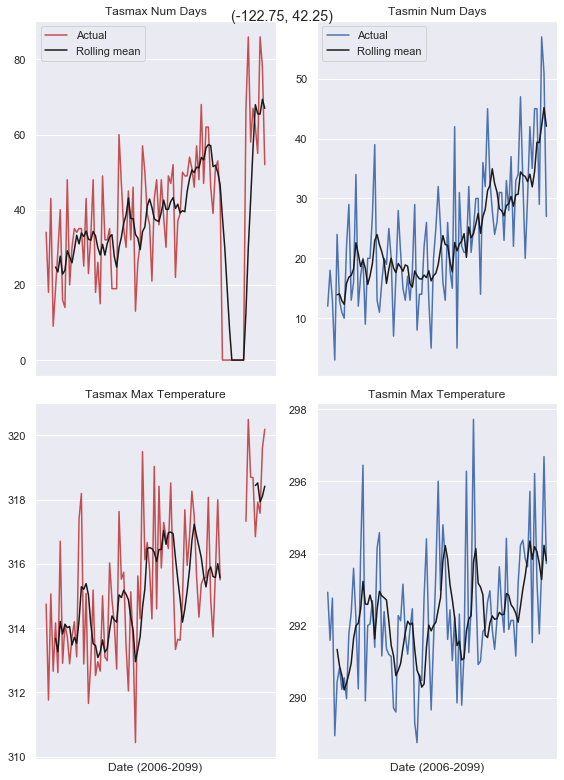

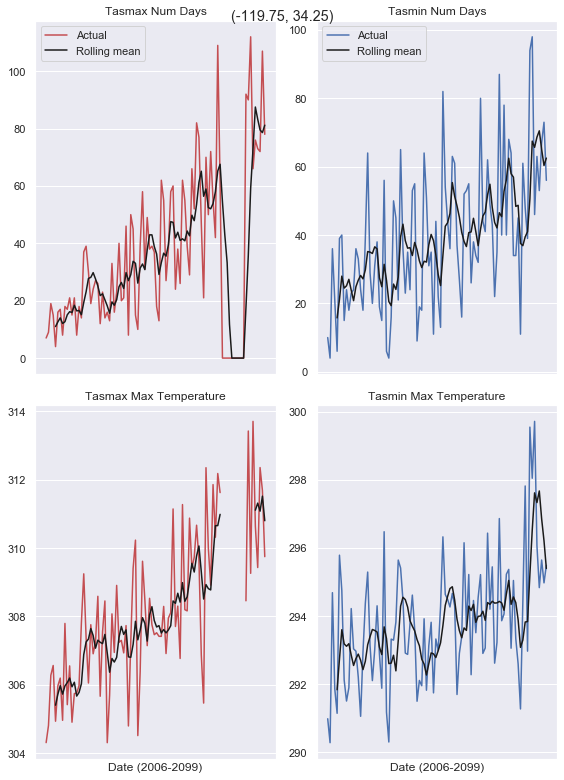

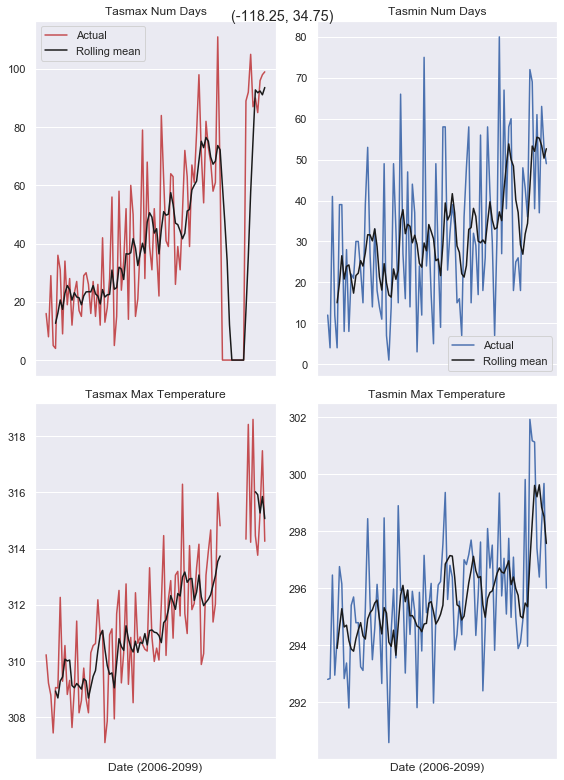

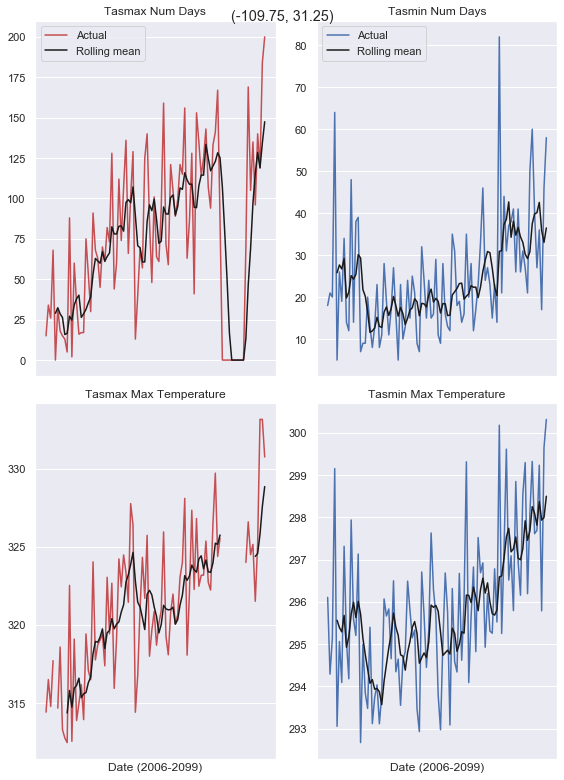

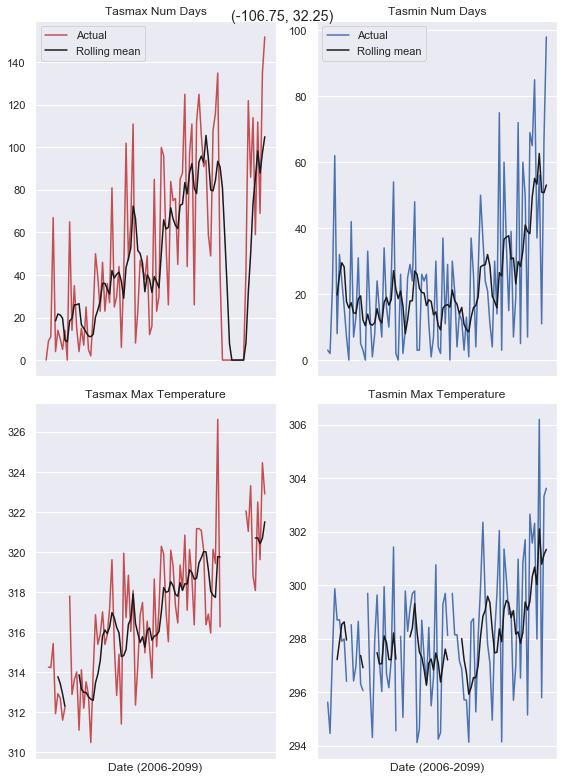

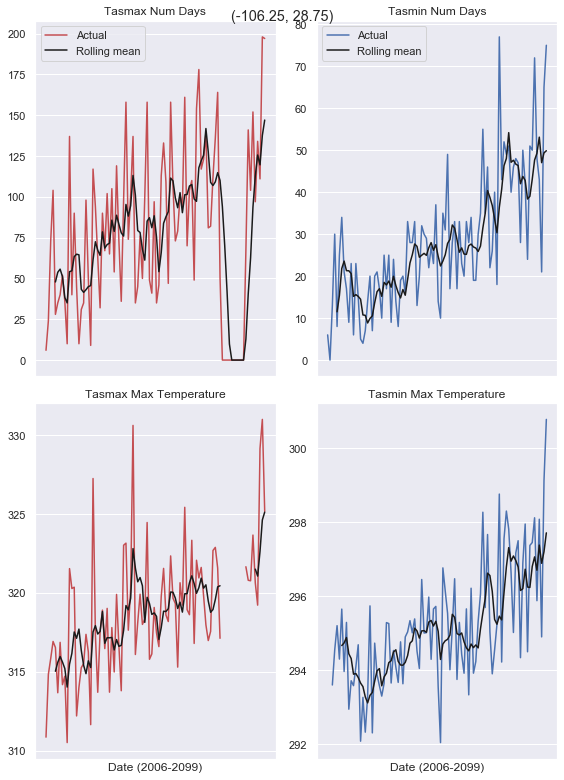

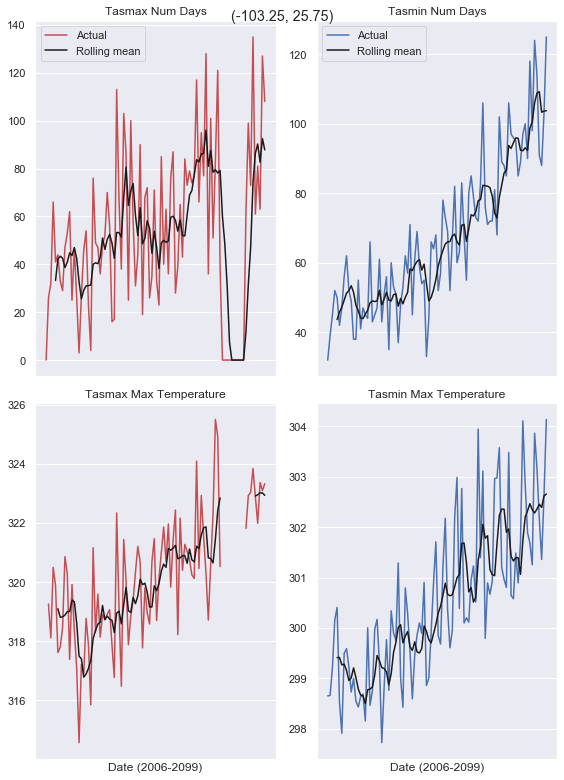

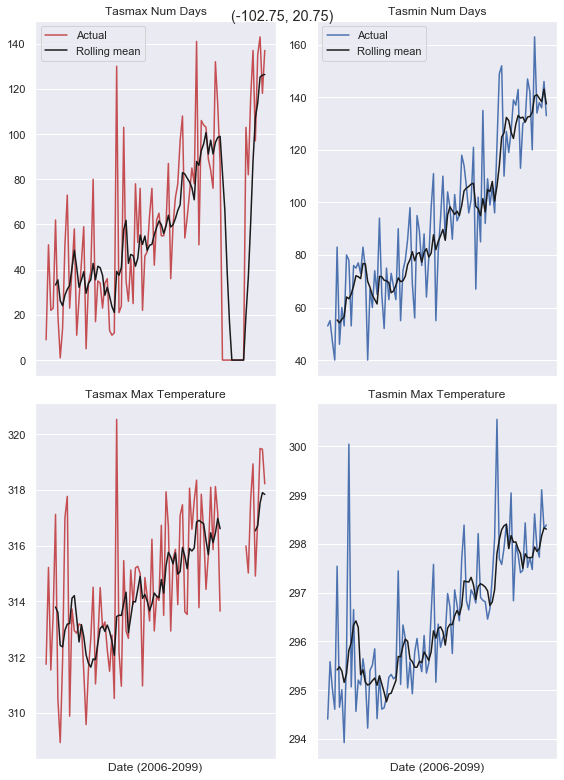

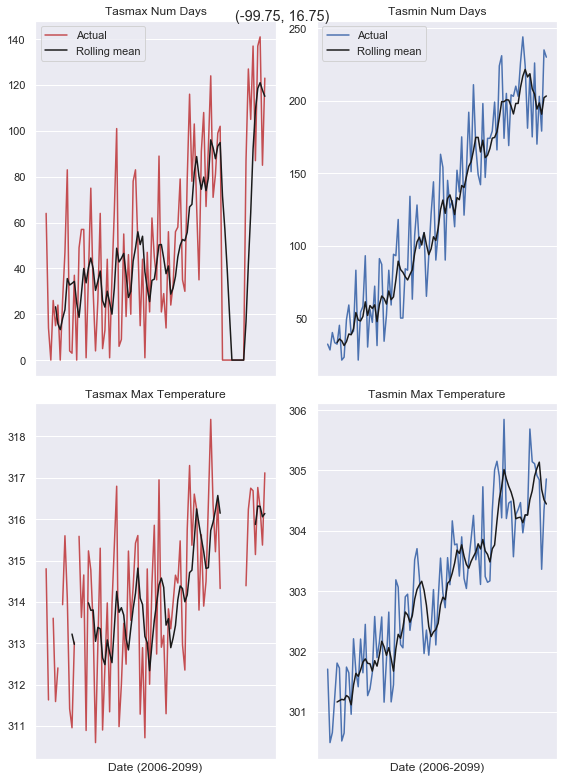

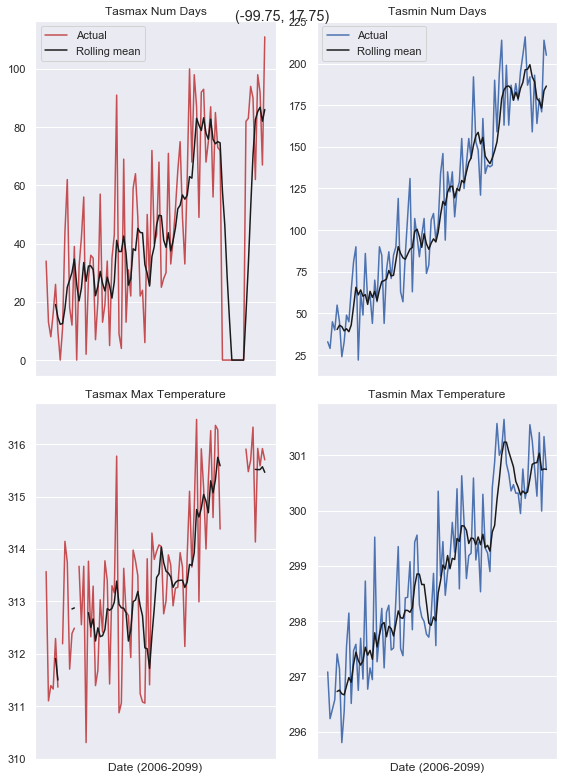

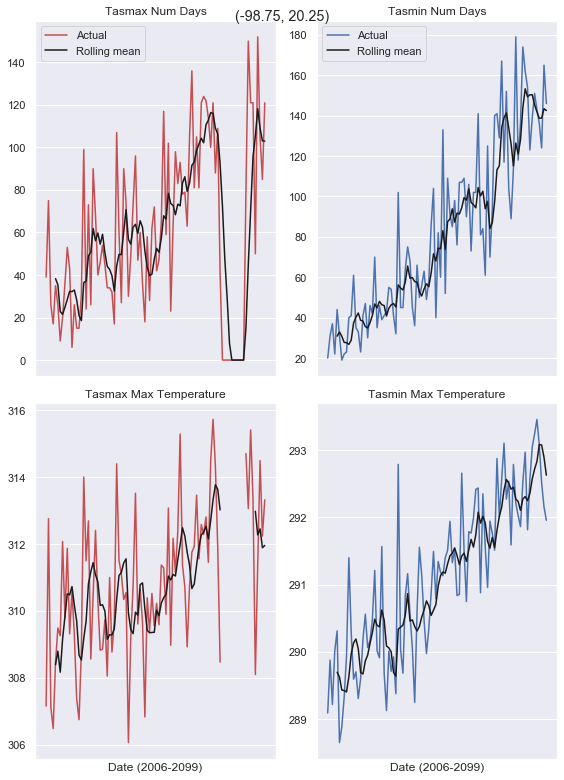

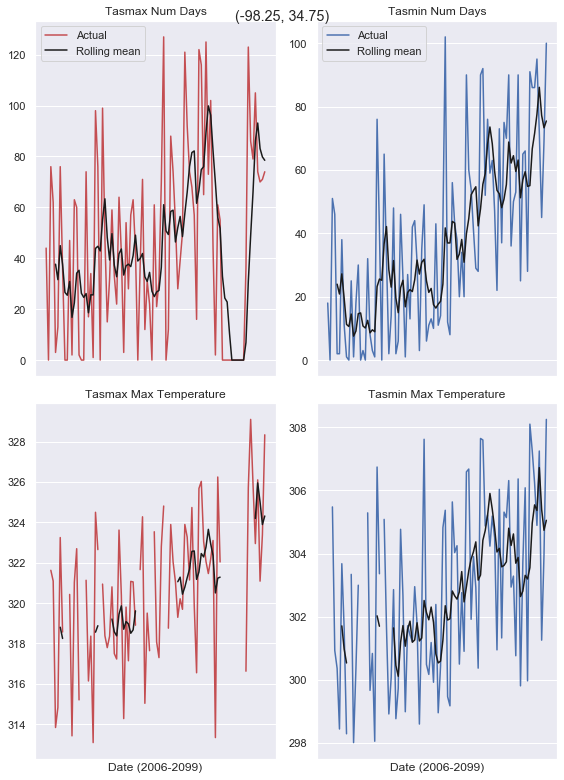

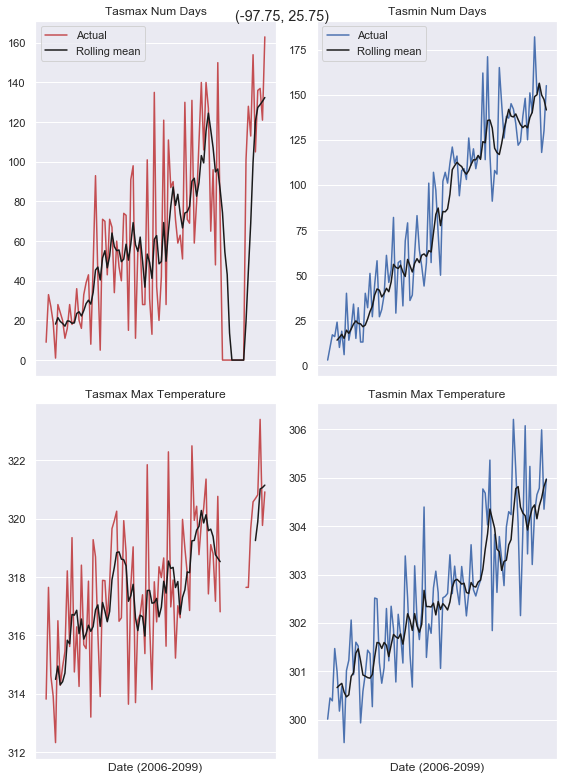

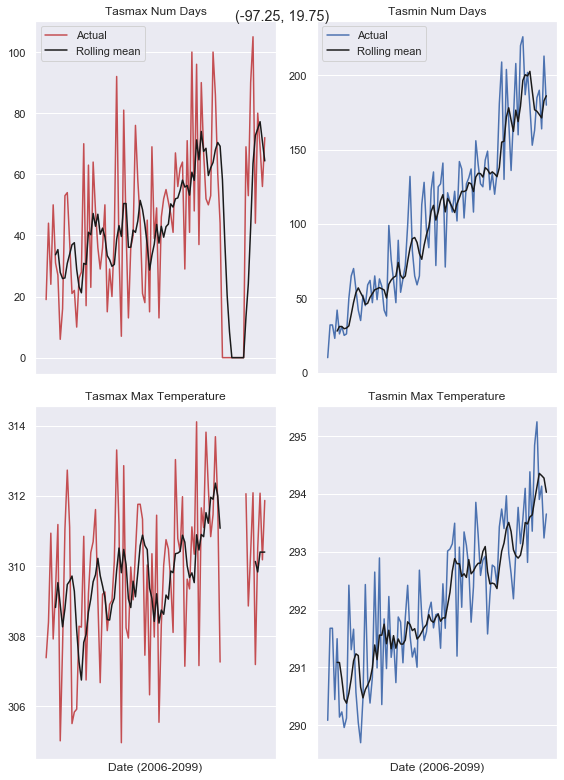

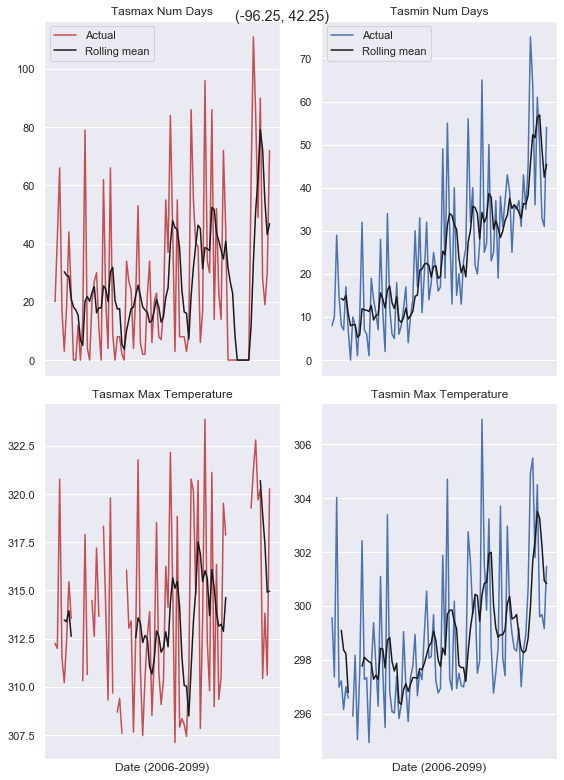

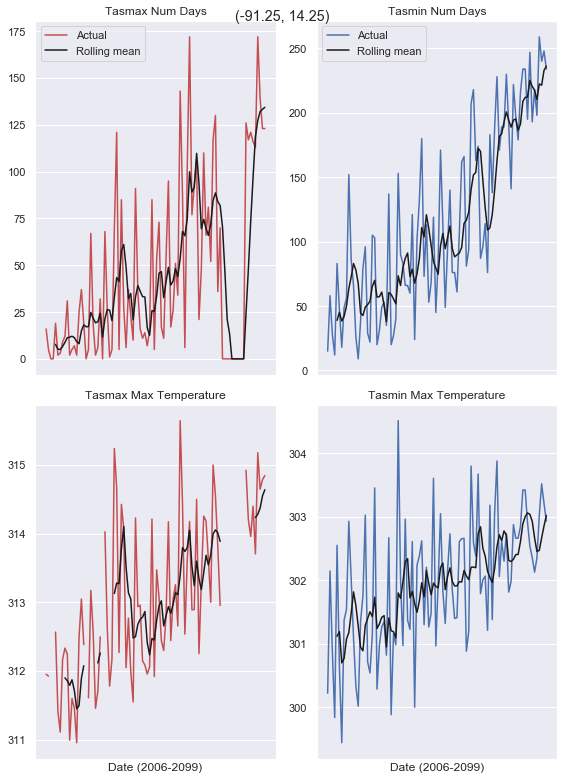

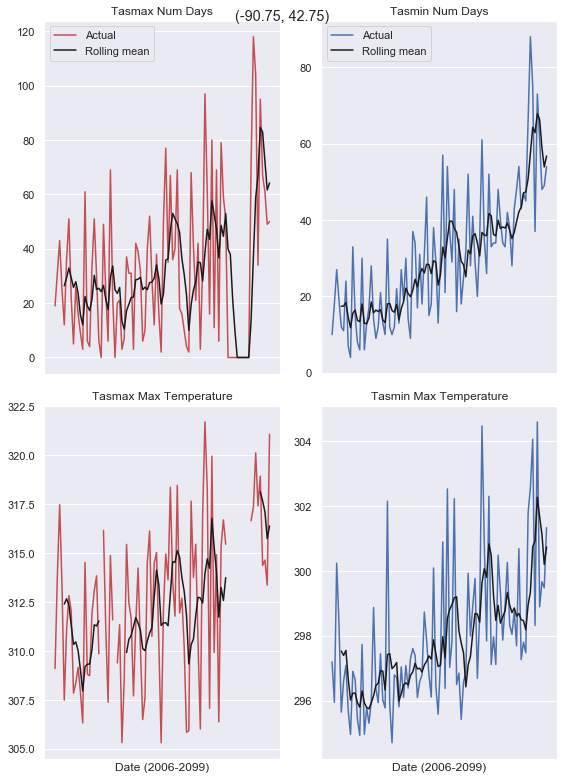

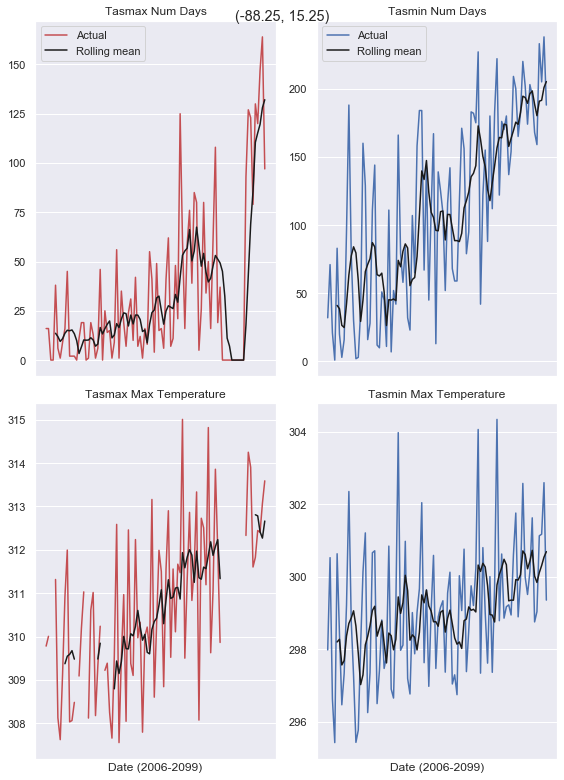

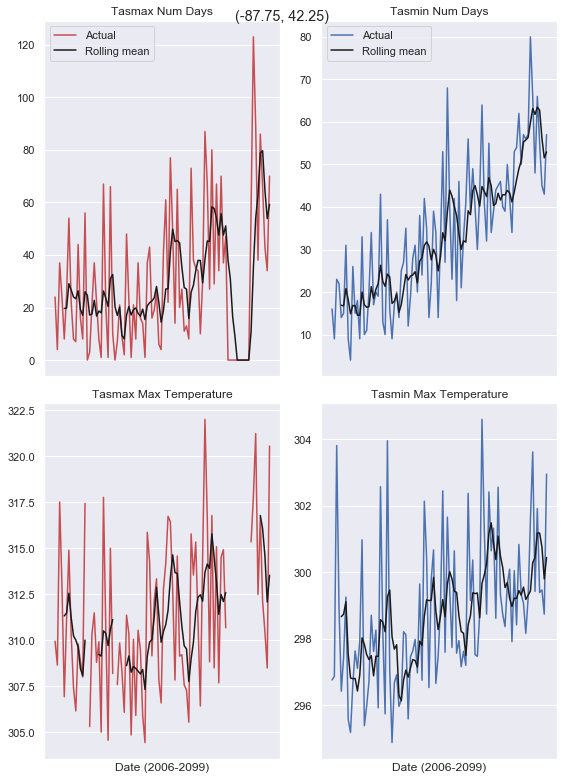

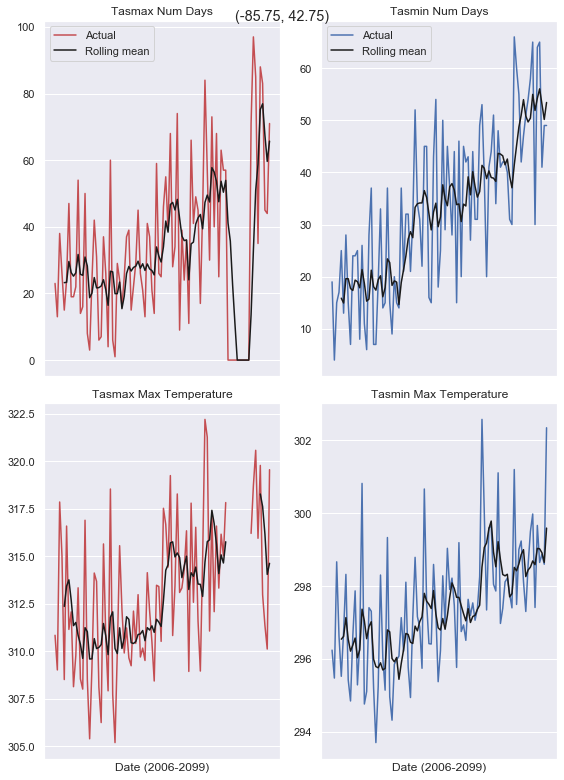

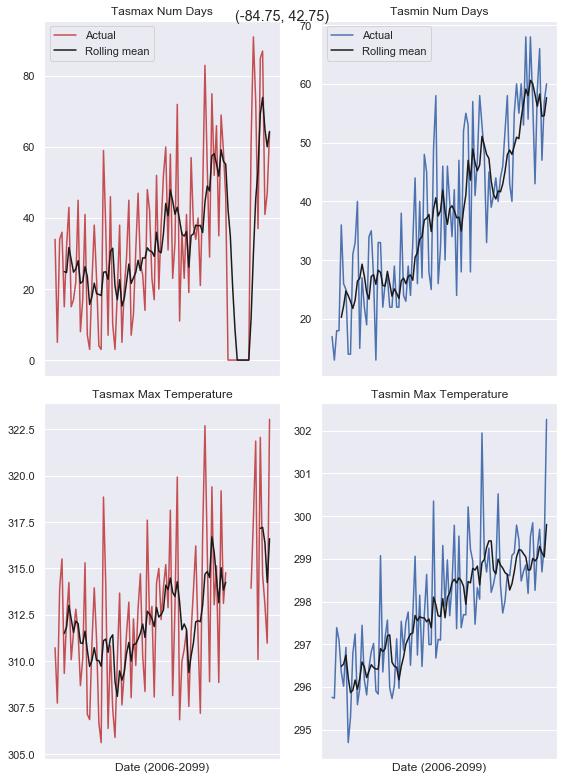

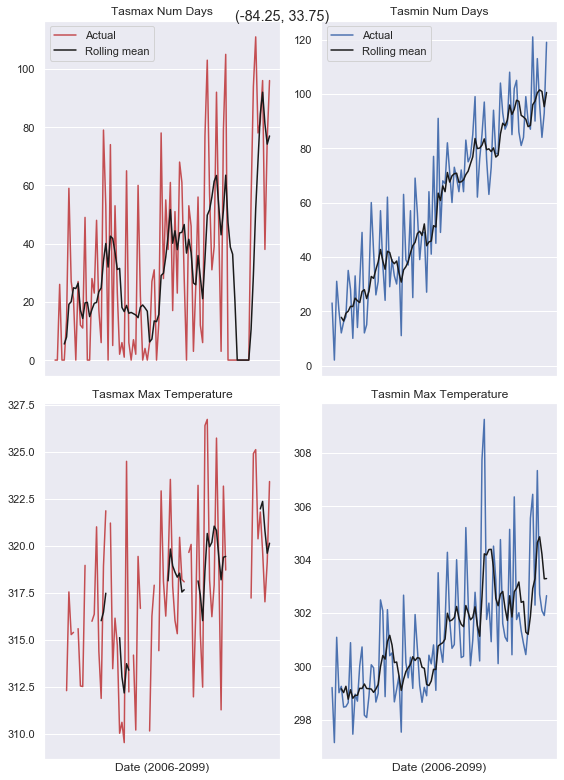

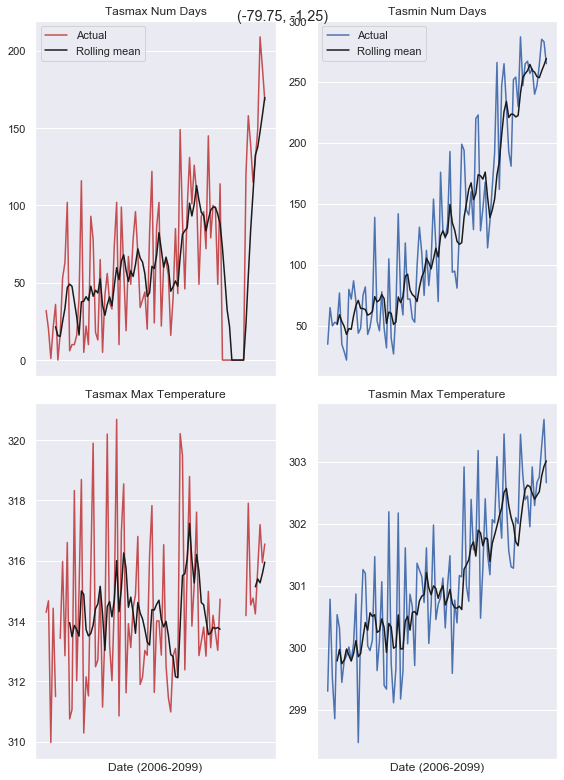

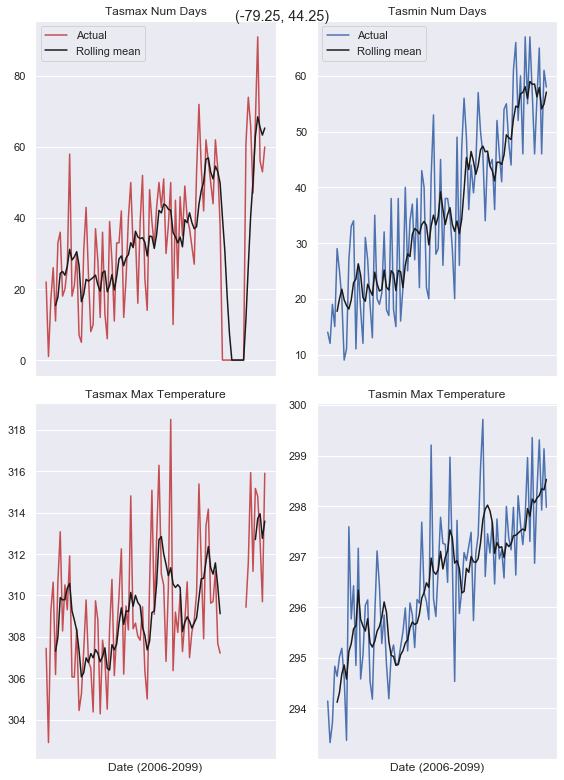

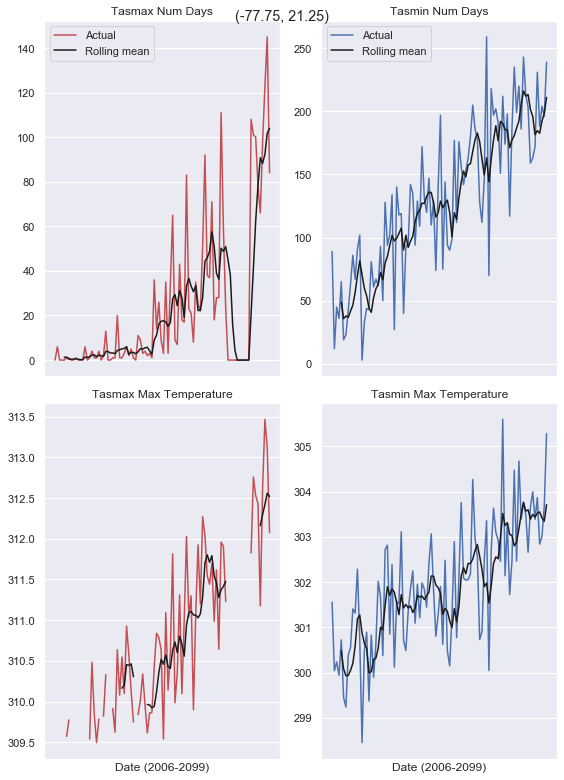

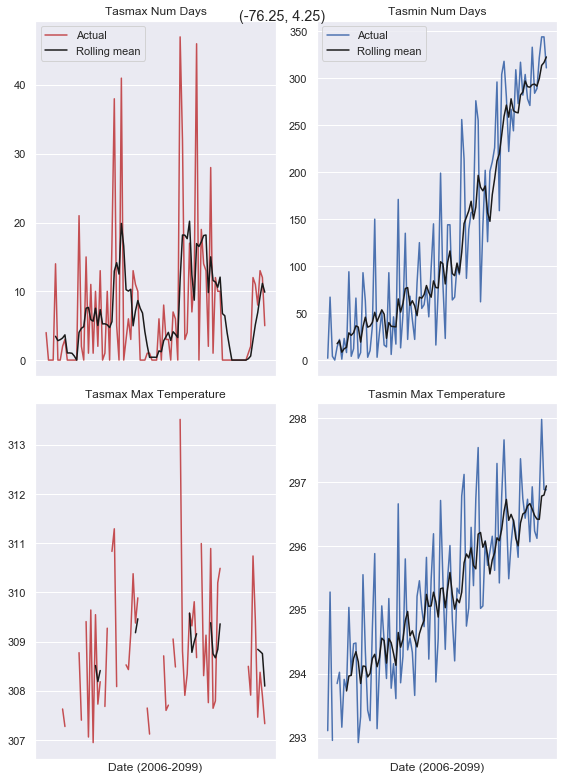

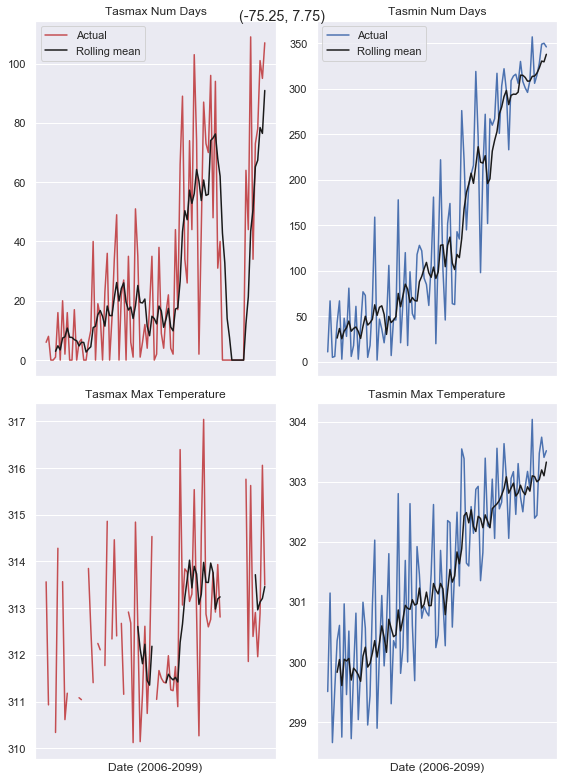

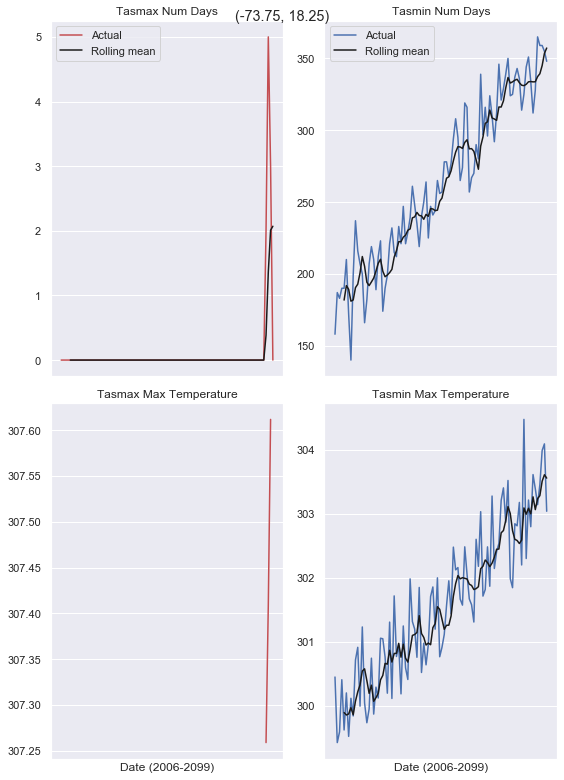

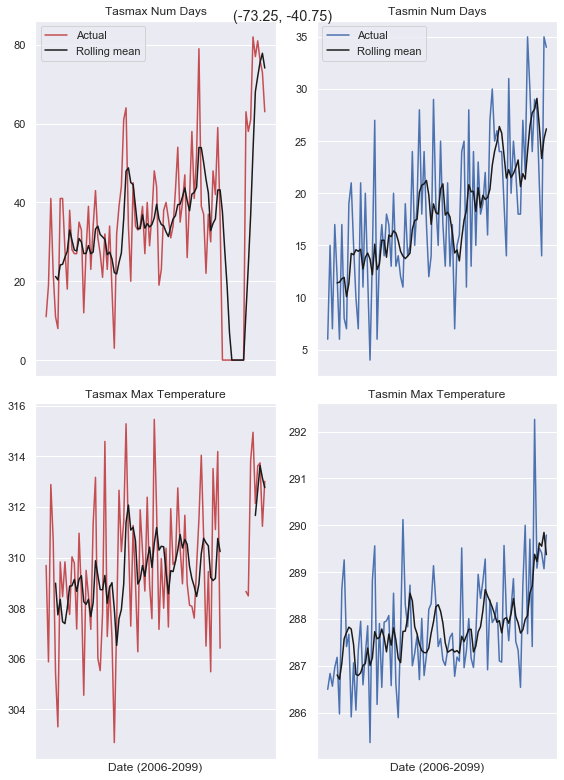

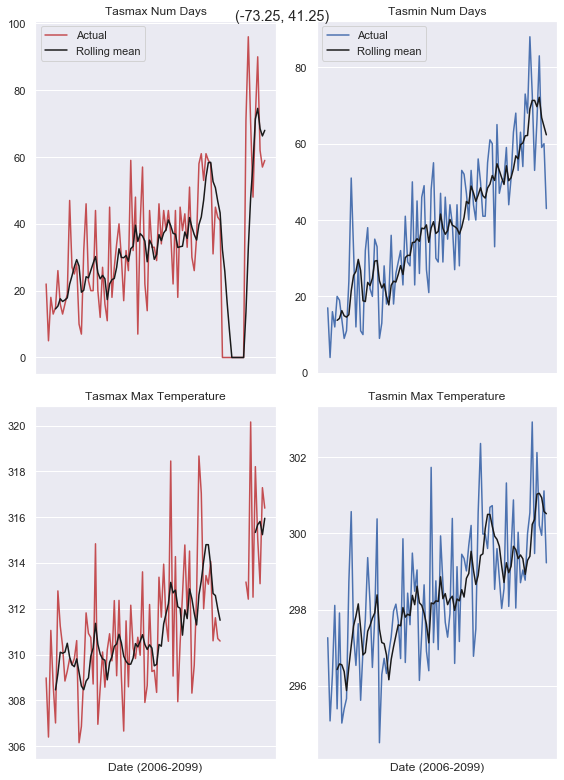

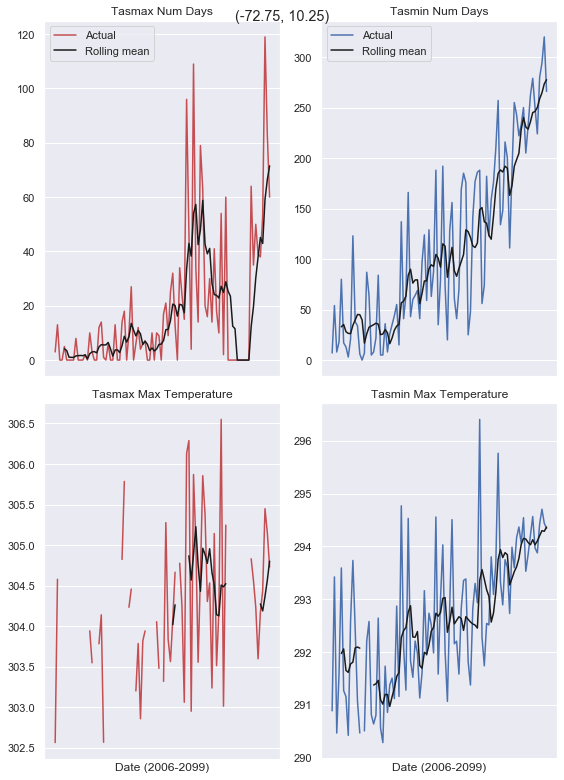

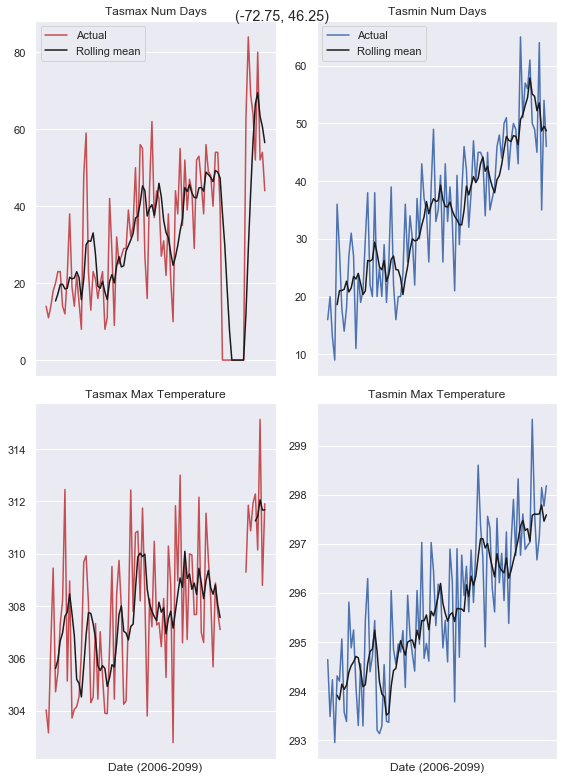

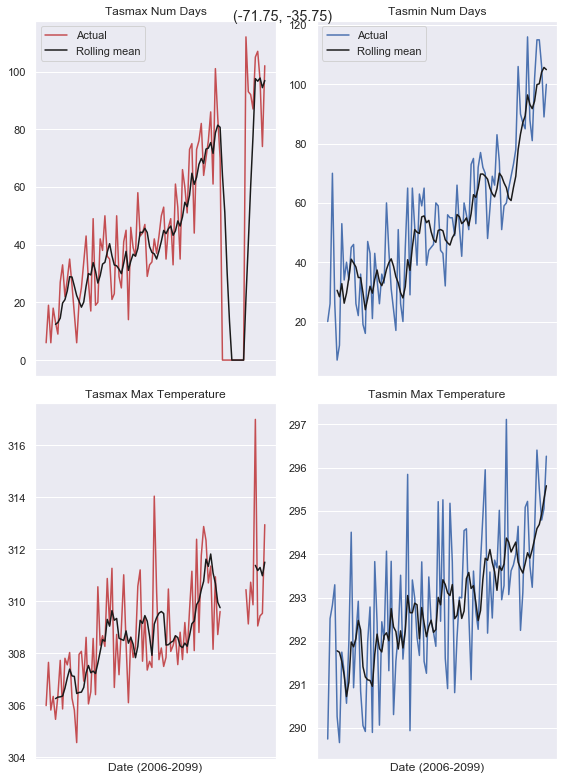

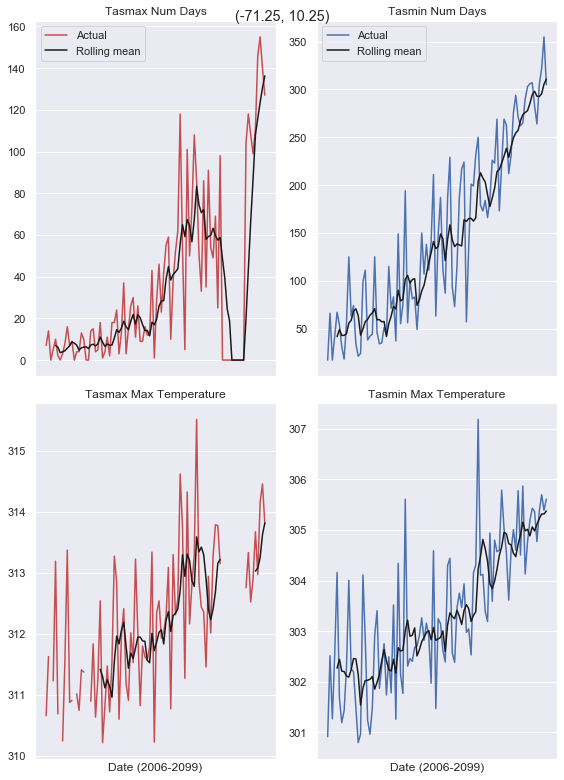

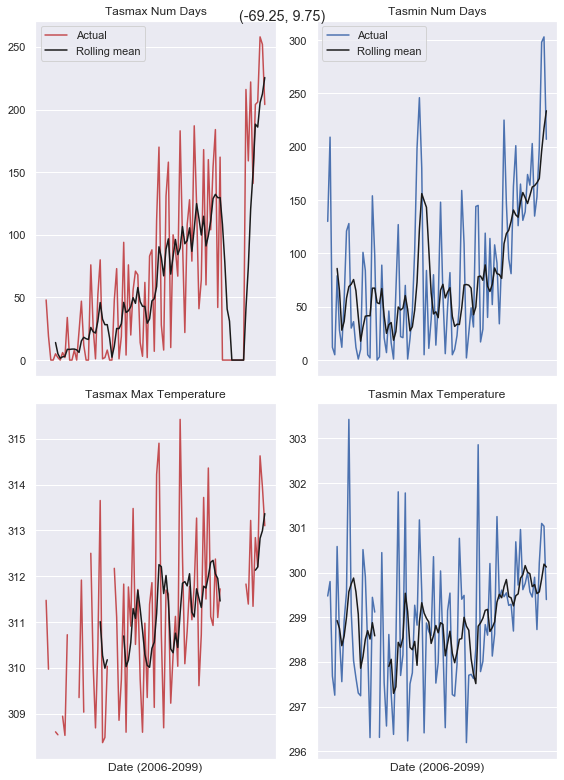

In [7]:
create_actual_data_plots()

In [14]:
analysis = pd.read_csv("analysis.csv")
analysis = analysis.set_index(["lon", "lat", "year"])
analysis

tasmax_num_days  tasmax_pct_days  tasmax_max_temp  \
lon     lat    year                                                            
-122.75  42.25 01/01/2006               34         0.093087       314.748779   
               01/01/2007               18         0.049281       311.763672   
               01/01/2008               43         0.117728       315.062805   
               01/01/2009                9         0.024641       312.657166   
               01/01/2010               19         0.052019       314.164001   
...                                    ...              ...              ...   
 144.75 -6.25  01/01/2095               29         0.079398       320.109863   
               01/01/2096                4         0.010951       316.082214   
               01/01/2097               42         0.114990       320.103607   
               01/01/2098                0         0.000000              NaN   
               01/01/2099                0         0.000000              NaN   

                           tasmin_num_days  tasmin_pct_days  tasmin_max_temp  
lon     lat    year                                                           
-122.75  42.25 01/01/2006               12         0.032854       292.928497  
               01/01/2007               18         0.049281       291.598755  
               01/01/2008               13         0.035592       292.765961  
               01/01/2009                3         0.008214       288.956512  
               01/01/2010               24         0.065708       290.444702  
...                                    ...              ...              ...  
 144.75 -6.25  01/01/2095              202         0.553046       298.004456  
               01/01/2096              222         0.607803       298.183350  
               01/01/2097              127         0.347707       297.702087  
               01/01/2098              256         0.700890       297.619263  
               01/01/2099              204         0.558522       297.589783  

[34122 rows x 6 columns]

Need overall graph for all the cells. 

In [7]:
cells = np.unique(analysis.index)
c = cells[0]

In [34]:
data = analysis.loc[c]
rolling = data.rolling(window=5, win_type="exponential")
rolling_mean = rolling.mean(tau=20)
rolling_mean

tasmax_num_days  tasmax_pct_days  tasmax_max_temp  \
year                                                            
01/01/2006              NaN              NaN              NaN   
01/01/2007              NaN              NaN              NaN   
01/01/2008              NaN              NaN              NaN   
01/01/2009              NaN              NaN              NaN   
01/01/2010         9.354931         0.025612              NaN   
...                     ...              ...              ...   
01/01/2095         5.568663         0.015246              NaN   
01/01/2096         6.622266         0.018131              NaN   
01/01/2097        15.026757         0.041141              NaN   
01/01/2098        15.181507         0.041565              NaN   
01/01/2099        15.289295         0.041860              NaN   

            tasmin_num_days  tasmin_pct_days  tasmin_max_temp  
year                                                           
01/01/2006              NaN              NaN              NaN  
01/01/2007              NaN              NaN              NaN  
01/01/2008              NaN              NaN              NaN  
01/01/2009              NaN              NaN              NaN  
01/01/2010        25.185461         0.068954       294.329036  
...                     ...              ...              ...  
01/01/2095       258.370499         0.707380       297.766012  
01/01/2096       248.920060         0.681506       297.940618  
01/01/2097       225.490579         0.617360       297.982387  
01/01/2098       217.603411         0.595766       297.976043  
01/01/2099       201.405928         0.551419       297.819016  

[94 rows x 6 columns]

In [164]:
analysis["tasmax_max_temp_filled"] = analysis.tasmax_max_temp.fillna(method="ffill")
analysis["tasmax_num_days"] = analysis["tasmax_num_days"].replace(0, np.nan)
analysis["tasmax_num_days_filled"] = analysis.tasmax_num_days.fillna(method="ffill")
analysis.loc[113.75, -1.25].tail(30)

tasmax_num_days  tasmax_pct_days  tasmax_max_temp  \
year                                                            
01/01/2070             11.0         0.030116       308.712219   
01/01/2071             10.0         0.027379       309.046204   
01/01/2072             19.0         0.052019       308.705139   
01/01/2073             15.0         0.041068       309.539825   
01/01/2074             10.0         0.027379       308.554535   
01/01/2075             21.0         0.057495       309.076813   
01/01/2076             16.0         0.043806       308.752289   
01/01/2077             44.0         0.120465       311.079742   
01/01/2078             15.0         0.041068       309.209534   
01/01/2079              9.0         0.024641       308.802032   
01/01/2080             88.0         0.240931       313.463715   
01/01/2081              NaN         0.000000              NaN   
01/01/2082              NaN         0.000000              NaN   
01/01/2083              NaN         0.000000              NaN   
01/01/2084              NaN         0.000000              NaN   
01/01/2085              NaN         0.000000              NaN   
01/01/2086              NaN         0.000000              NaN   
01/01/2087              NaN         0.000000              NaN   
01/01/2088              NaN         0.000000              NaN   
01/01/2089              NaN         0.000000              NaN   
01/01/2090              NaN         0.000000              NaN   
01/01/2091             69.0         0.188912       310.338684   
01/01/2092             54.0         0.147844       309.150391   
01/01/2093             81.0         0.221766       310.833191   
01/01/2094             62.0         0.169747       310.297363   
01/01/2095             70.0         0.191650       309.859711   
01/01/2096             76.0         0.208077       309.848022   
01/01/2097            213.0         0.583162       316.541138   
01/01/2098             68.0         0.186174       309.774902   
01/01/2099             85.0         0.232717       310.413788   

            tasmin_num_days  tasmin_pct_days  tasmin_max_temp  \
year                                                            
01/01/2070              306         0.837782       303.959412   
01/01/2071              303         0.829569       302.151276   
01/01/2072              265         0.725530       303.008514   
01/01/2073              221         0.605065       303.284973   
01/01/2074              315         0.862423       303.739380   
01/01/2075              267         0.731006       303.102905   
01/01/2076              287         0.785763       303.450623   
01/01/2077              244         0.668036       302.555176   
01/01/2078              290         0.793977       303.439789   
01/01/2079              280         0.766598       303.477264   
01/01/2080              272         0.744695       302.320129   
01/01/2081              319         0.873374       303.955444   
01/01/2082              316         0.865161       304.819275   
01/01/2083              283         0.774812       302.427338   
01/01/2084              284         0.777550       302.739319   
01/01/2085              239         0.654346       302.874756   
01/01/2086              304         0.832307       302.719757   
01/01/2087              305         0.835044       304.145752   
01/01/2088              252         0.689938       302.870941   
01/01/2089              322         0.881588       303.690369   
01/01/2090              313         0.856947       302.462372   
01/01/2091              348         0.952772       303.555389   
01/01/2092              345         0.944559       302.982574   
01/01/2093              345         0.944559       303.728973   
01/01/2094              340         0.930869       303.441864   
01/01/2095              314         0.859685       303.597565   
01/01/2096              320         0.876112       303.524841   
01/01/2097              309         0.845996  

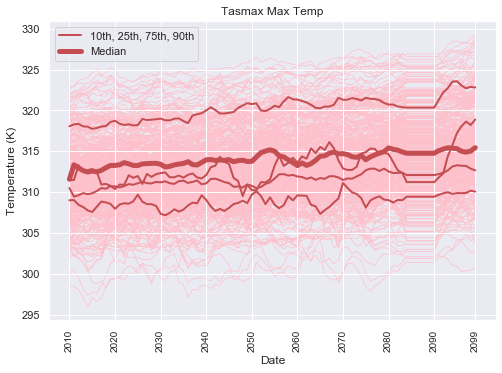

In [158]:
ax = plot_meta_plot("tasmax_max_temp_filled")
ax.set(title="Tasmax Max Temp", ylabel="Temperature (K)")
plt.show()

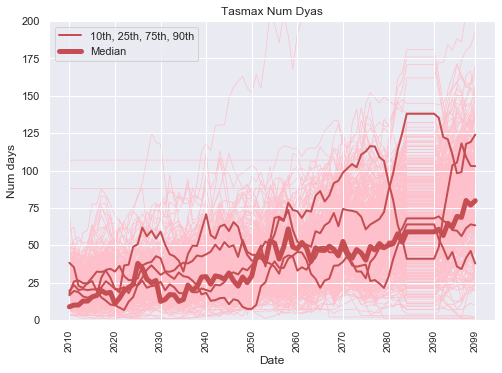

In [168]:
ax = plot_meta_plot("tasmax_num_days_filled")
ax.set(title="Tasmax Num Dyas", ylabel="Num days", ylim=[0, 200])
plt.show()

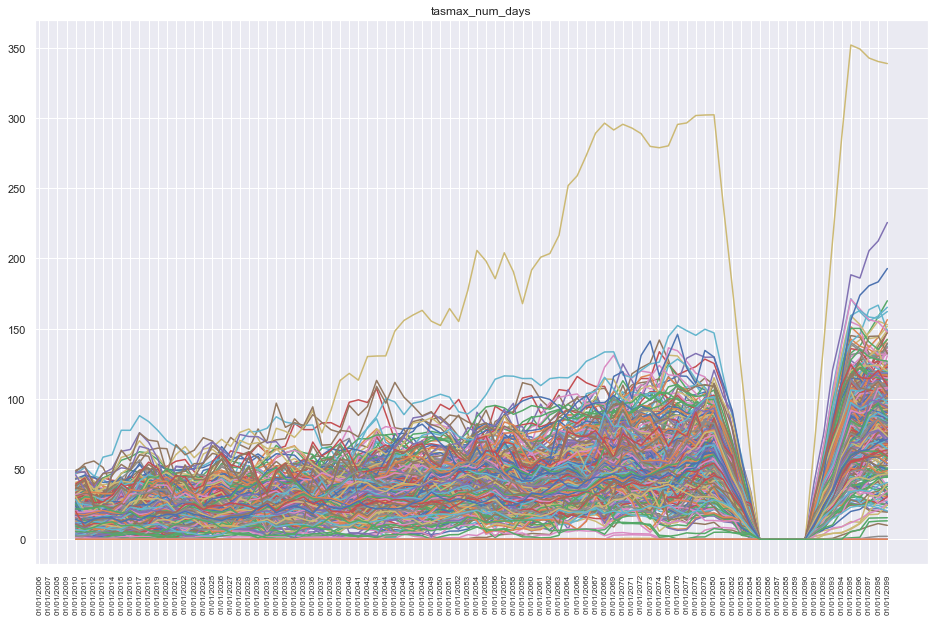

In [33]:
fig, ax = plt.subplots(figsize=(8, 5.5))
for c in cells:
    data = analysis.loc[c]
    rolling = data.rolling(window=5, win_type="exponential")
    rolling_mean = rolling.mean(tau=20)
    ax.plot(rolling_mean.tasmax_num_days)
    plt.xticks(rotation=90, size=8)
ax.set(title="tasmax_num_days")
plt.show()

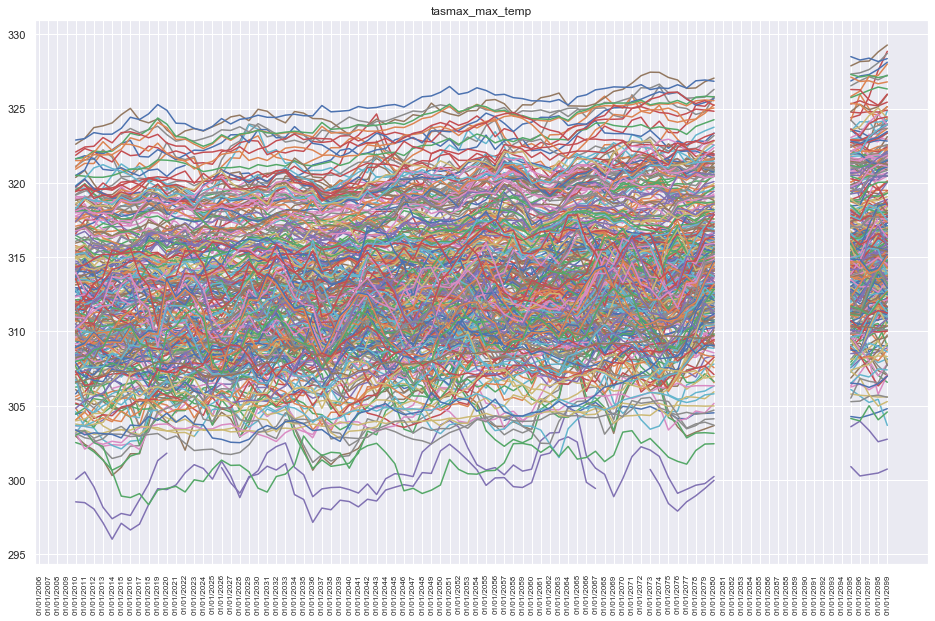

In [32]:
fig, ax = plt.subplots(figsize=(8, 5.5))
for c in cells:
    data = analysis.loc[c]
    rolling = data.rolling(window=5, win_type="exponential")
    rolling_mean = rolling.mean(tau=20)
    ax.plot(rolling_mean.tasmax_max_temp)
    plt.xticks(rotation=90, size=8)
ax.set(title="tasmax_max_temp")
plt.show()

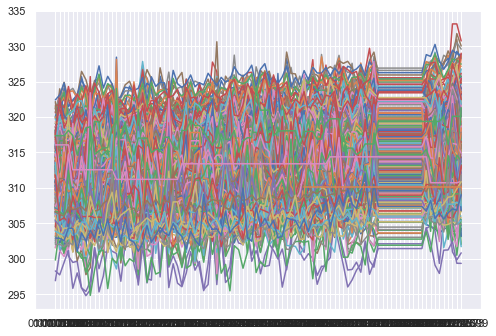

In [154]:
tasmax_filled = analysis.tasmax_max_temp.fillna(method="ffill")

fig, ax = plt.subplots(figsize=(8, 5.5))
for c in cells:
    tasmax_filled = analysis.loc[c].tasmax_max_temp.fillna(method="ffill")
    plt.plot(tasmax_filled)

In [138]:
def get_list_sorted_by_final_val(column):
    """
    Given a column in analysis.csv, go through each cell and get the final value
    in a rolling exponential mean plot.

    Return a list of cells and final values in ascending order.

    This is used to calculate the quantiles on the 'meta plots'.

    Note: you must have all cells stored in a list 'cells' and 'analysis.csv'
    loaded in as 'analysis' with 'lon' and 'lat' as the index
    """
    all_final_vals = []
    for c in cells:
        data = analysis.loc[c]
        rolling = data.rolling(window=5, win_type="exponential")
        rolling_mean = rolling.mean(tau=20)

        final_val = rolling_mean[column].iloc[-1]
        all_final_vals.append(final_val)

    cell_and_final_vals = list(zip(cells, all_final_vals))
    c_and_f_ascending = sorted(cell_and_final_vals, key=lambda x: x[-1])
    return c_and_f_ascending

In [137]:
def get_quantiles(lst):
    """
    Given a list 'lst' return the indexes of 10th, 25th, 50th, 75th and
    90th percentiles as a list
    """
    tenth = round(len(lst) * 0.1)
    quarter = round(len(lst) * 0.25)
    median = round(len(lst) * 0.5)
    three_quarter = round(len(lst) * 0.75)
    ninety = round(len(lst) * 0.9)
    quantiles = [tenth, quarter, median, three_quarter, ninety]
    return quantiles

In [139]:
def plot_meta_plot(column):

    fig, ax = plt.subplots(figsize=(8, 5.5))
    c_and_f_ascending = get_list_sorted_by_final_val(column)
    quantiles = get_quantiles(c_and_f_ascending)
    labels = [
        "2010",
        "2020",
        "2030",
        "2040",
        "2050",
        "2060",
        "2070",
        "2080",
        "2090",
        "2099",
    ]
    xticks = [4, 14, 24, 34, 44, 54, 64, 74, 84, 93]

    for i, c in enumerate(c_and_f_ascending):
        data = analysis.loc[c[0]]
        rolling = data.rolling(window=5, win_type="exponential")
        rolling_mean = rolling.mean(tau=20)

        if i == median:
            ax.plot(rolling_mean[column], "r", lw=5, zorder=20, label="Median")
        elif i == quantiles[0]:
            ax.plot(
                rolling_mean[column],
                "r",
                lw=2,
                zorder=10,
                label="10th, 25th, 75th, 90th",
            )
        elif i in quantiles:
            ax.plot(rolling_mean[column], "r", lw=2, zorder=10)
        else:
            ax.plot(rolling_mean[column], "pink", lw=0.7, zorder=0)

    ax.set(xlabel="Date")
    ax.legend(prop=dict(size=11))
    plt.xticks([])
    plt.xticks(xticks, labels, rotation=90, size=10)
    return ax

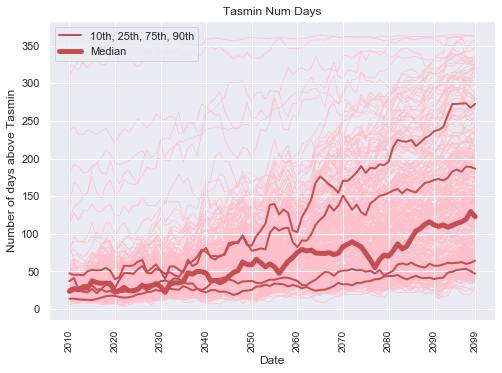

In [142]:
ax = plot_meta_plot("tasmin_num_days")
ax.set(ylabel="Number of days above Tasmin", title="Tasmin Num Days")
plt.show()

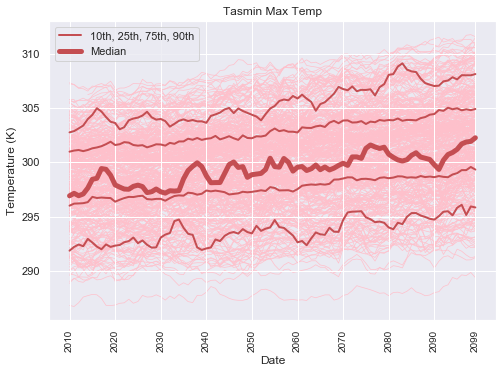

In [143]:
ax = plot_meta_plot("tasmin_max_temp")
ax.set(ylabel="Temperature (K)", title="Tasmin Max Temp")
plt.show()

In [43]:
c = cells[0]
data = analysis.loc[c]
rolling = data.rolling(window=5, win_type="exponential")
rolling_mean = rolling.mean(tau=20)
final_val = rolling_mean.tasmin_num_days.iloc[-1]

year
01/01/2006          NaN
01/01/2007          NaN
01/01/2008          NaN
01/01/2009          NaN
01/01/2010    13.910888
                ...    
01/01/2095    39.391872
01/01/2096    39.332885
01/01/2097    42.154156
01/01/2098    45.179065
01/01/2099    42.071525
Name: tasmin_num_days, Length: 94, dtype: float64

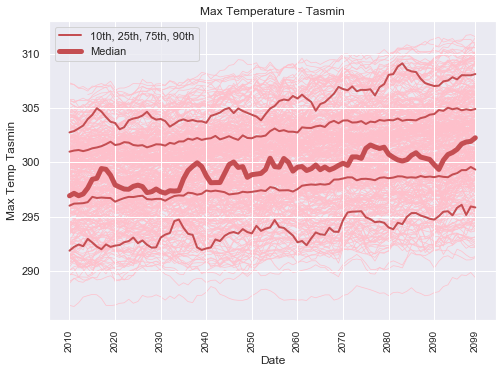

In [136]:
# all_final_vals = []
fig, ax = plt.subplots(figsize=(8, 5.5))
for i, c in enumerate(c_and_f_ascending):
    data = analysis.loc[c[0]]
    rolling = data.rolling(window=5, win_type="exponential")
    rolling_mean = rolling.mean(tau=20)

    if i == median:
        ax.plot(rolling_mean.tasmin_max_temp, "r", lw=5, zorder=20, label="Median")
    elif i == quantiles[0]:
        ax.plot(
            rolling_mean.tasmin_max_temp,
            "r",
            lw=2,
            zorder=10,
            label="10th, 25th, 75th, 90th",
        )
    elif i in quantiles:
        ax.plot(rolling_mean.tasmin_max_temp, "r", lw=2, zorder=10)
    else:
        ax.plot(rolling_mean.tasmin_max_temp, "pink", lw=0.7, zorder=0)
#     final_val = rolling_mean.tasmin_max_temp.iloc[-1]
#     all_final_vals.append(final_val)
ax.set(title="Max Temperature - Tasmin", xlabel="Date", ylabel="Max Temp Tasmin")
ax.legend(prop=dict(size=11))
plt.xticks([])
plt.xticks(xtick_4, labels, rotation=90, size=10)
plt.show()

In [129]:
rolling_mean.tasmin_max_temp

year
01/01/2006           NaN
01/01/2007           NaN
01/01/2008           NaN
01/01/2009           NaN
01/01/2010    305.421706
                 ...    
01/01/2095    311.064742
01/01/2096    311.191030
01/01/2097    311.707433
01/01/2098    311.762617
01/01/2099    311.576072
Name: tasmin_max_temp, Length: 94, dtype: float64

In [134]:
x
labels = np.arange("2010-01-01", "2110-01-01", 10, dtype="datetime64[Y]")
print(len(labels))
len(x[0])

l = [labels for (i, l) in enumerate(x[0]) if i % 10 == 0]

# for i, l in enumerate(x[0])
labels = [
    "2010",
    "2020",
    "2030",
    "2040",
    "2050",
    "2060",
    "2070",
    "2080",
    "2090",
    "2099",
]
xtick_3 = [3, 13, 23, 33, 43, 53, 63, 73, 83, 92]
xtick_4 = [x + 1 for x in xtick_3]

len(xtick) == len(labels)

10


True

In [76]:
cell_and_final_vals = list(zip(cells, all_final_vals))
c_and_f_ascending = sorted(cell_and_final_vals, key=lambda x: x[-1])

tenth = round(len(c_and_f_ascending) * 0.1)
quarter = round(len(c_and_f_ascending) * 0.25)
median = round(len(c_and_f_ascending) * 0.5)
three_quarter = round(len(c_and_f_ascending) * 0.75)
ninety = round(len(c_and_f_ascending) * 0.9)

quantiles = [tenth, quarter, median, three_quarter, ninety]
quantiles

[36, 91, 182, 272, 327]

In [166]:
for x in c_and_f_ascending[:20]:
    print(x)

((-73.25, -40.75), 289.3720676287301)
((-9.25, 53.25), 291.21779407395206)
((-3.75, 55.75), 291.30642706145716)
((31.75, 40.75), 292.165731770176)
((-2.75, 52.75), 292.2301225010767)
((90.25, 56.25), 292.31833855142395)
((-2.25, 52.75), 292.486571635731)
((-98.75, 20.25), 292.6269513121134)
((-1.25, 53.75), 292.80631998452697)
((39.75, 10.75), 293.0657680785615)
((102.75, 35.75), 293.15343033172536)
((-1.25, 51.75), 293.6732030536041)
((1.75, 52.25), 293.7313916861919)
((-122.75, 42.25), 293.80408040502937)
((-97.25, 19.75), 294.0282822249236)
((103.75, 52.75), 294.0551765416245)
((68.25, 33.75), 294.2902549767541)
((-72.75, 10.25), 294.3666976962351)
((28.75, -1.75), 294.4760434642551)
((39.75, 57.75), 294.5790589183611)


In [70]:
final_series = pd.Series(all_final_vals)
quantiles = final_series.quantile([0.1, 0.25, 0.5, 0.75, 0.9])
quantiles.values

array([295.85233627, 299.22482398, 302.24005134, 304.87471675,
       307.88548921])